In [6]:
%matplotlib tk


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- RUTA DEL ARCHIVO ---
ruta = r"C:\Users\Usuario\Desktop\Uni\Labo II\VSM\LL01_20kG_MF.txt"

# --- LEER EL ARCHIVO Y EXTRAER SOLO LA PARTE DE DATOS ---
with open(ruta, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Buscar el índice donde empieza "***DATA***"
start = None
for i, line in enumerate(lines):
    if "***DATA***" in line:
        start = i + 1
        break

# Extraer solo las líneas de datos (saltando encabezados vacíos)
data_lines = [l.strip() for l in lines[start:] if l.strip() and not l.startswith("***")]

# Ignorar posibles líneas que no sean numéricas
data = []
for l in data_lines:
    parts = l.split()
    if len(parts) == 2:
        try:
            x = float(parts[0])
            y = float(parts[1])
            data.append((x, y))
        except ValueError:
            pass

# Convertir a listas
import numpy as np
field = np.array([d[0] for d in data])
moment = np.array([d[1] for d in data])

# --- GRAFICAR ---
plt.figure(figsize=(8,6))
plt.plot(field, moment, '-', lw=1.5)
plt.title("LL01", fontsize=13)
plt.xlabel("Campo Magnético (G)", fontsize=12)
plt.ylabel("Momento Magnético (emu)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- RUTA DEL ARCHIVO ---
ruta = r"C:\Users\Usuario\Desktop\Uni\Labo II\VSM\LL02_20kG_MF.txt"

# --- LEER EL ARCHIVO Y EXTRAER SOLO LA PARTE DE DATOS ---
with open(ruta, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Buscar el índice donde empieza "***DATA***"
start = None
for i, line in enumerate(lines):
    if "***DATA***" in line:
        start = i + 1
        break

# Extraer solo las líneas de datos (saltando encabezados vacíos)
data_lines = [l.strip() for l in lines[start:] if l.strip() and not l.startswith("***")]

# Ignorar posibles líneas que no sean numéricas
data = []
for l in data_lines:
    parts = l.split()
    if len(parts) == 2:
        try:
            x = float(parts[0])
            y = float(parts[1])
            data.append((x, y))
        except ValueError:
            pass

# Convertir a listas
import numpy as np
field = np.array([d[0] for d in data])
moment = np.array([d[1] for d in data])

# --- GRAFICAR ---
plt.figure(figsize=(8,6))
plt.plot(field, moment, '-', lw=1.5)
plt.title("Curva de Magnetización: LL02_20kG_MF", fontsize=13)
plt.xlabel("Campo Magnético (G)", fontsize=12)
plt.ylabel("Momento Magnético (emu)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# --- RUTA DEL ARCHIVO ---
ruta = r"C:\Users\Usuario\Desktop\Uni\Labo II\VSM\LL02_20kG_MF_v2.txt"

# --- LEER EL ARCHIVO Y EXTRAER SOLO LA PARTE DE DATOS ---
with open(ruta, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Buscar el índice donde empieza "***DATA***"
start = None
for i, line in enumerate(lines):
    if "***DATA***" in line:
        start = i + 1
        break

# Extraer solo las líneas de datos (saltando encabezados vacíos)
data_lines = [l.strip() for l in lines[start:] if l.strip() and not l.startswith("***")]

# Ignorar posibles líneas que no sean numéricas
data = []
for l in data_lines:
    parts = l.split()
    if len(parts) == 2:
        try:
            x = float(parts[0])
            y = float(parts[1])
            data.append((x, y))
        except ValueError:
            pass

# Convertir a listas
import numpy as np
field = np.array([d[0] for d in data])
moment = np.array([d[1] for d in data])

# --- GRAFICAR ---
plt.figure(figsize=(8,6))
plt.plot(field, moment, '-', lw=1.5)
plt.title("LL02", fontsize=13)
plt.xlabel("Campo Magnético (G)", fontsize=12)
plt.ylabel("Momento Magnético (emu)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

--- LL01 ---
Ms (magnetización de saturación): 0.00572 emu
Mr (remanencia): 0.00273 emu
Hc- (coercitivo negativo): -4113.9 G
Hc+ (coercitivo positivo): 4469.5 G


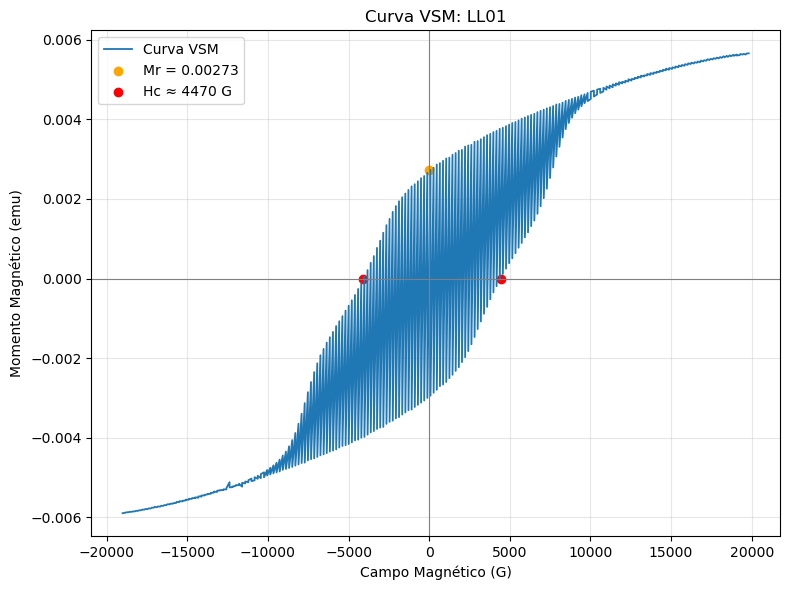

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
ruta = r"C:\Users\Usuario\Desktop\Uni\Labo II\VSM\LL01_20kG_MF.txt"
nombre_muestra = "LL01"

# --- LECTURA AUTOMÁTICA DEL ARCHIVO ---
with open(ruta, "r", encoding="utf-8") as f:
    lineas = f.readlines()

# Encontrar dónde empieza la tabla de datos
inicio = None
for i, linea in enumerate(lineas):
    if "***DATA***" in linea:
        inicio = i + 1
        break

# Extraer solo las líneas numéricas después de ***DATA***
datos = []
for linea in lineas[inicio:]:
    partes = linea.strip().split()
    if len(partes) == 2:
        try:
            campo = float(partes[0])
            momento = float(partes[1])
            datos.append([campo, momento])
        except ValueError:
            pass

df = pd.DataFrame(datos, columns=["Campo_G", "Momento_emu"])
df = df.dropna().sort_values("Campo_G")

# --- CÁLCULO DE PARÁMETROS MAGNÉTICOS ---
campo = df["Campo_G"].values
momento = df["Momento_emu"].values

# Saturación: promedio de los extremos (±90% del campo máximo)
Ms_pos = np.mean(momento[campo > np.max(campo) * 0.9])
Ms_neg = np.mean(momento[campo < np.min(campo) * 0.9])
Ms = (abs(Ms_pos) + abs(Ms_neg)) / 2

# Remanencia: valor más cercano a H = 0
idx_cero = np.argmin(abs(campo))
Mr = momento[idx_cero]

# Campo coercitivo: donde M cruza 0
signos = np.sign(momento)
cambio = np.where(np.diff(signos))[0]
if len(cambio) >= 2:
    Hc_neg = np.mean([campo[cambio[0]], campo[cambio[0] + 1]])
    Hc_pos = np.mean([campo[cambio[-1]], campo[cambio[-1] + 1]])
else:
    Hc_pos = Hc_neg = np.nan

# --- MOSTRAR RESULTADOS ---
print(f"--- {nombre_muestra} ---")
print(f"Ms (magnetización de saturación): {Ms:.5f} emu")
print(f"Mr (remanencia): {Mr:.5f} emu")
print(f"Hc- (coercitivo negativo): {Hc_neg:.1f} G")
print(f"Hc+ (coercitivo positivo): {Hc_pos:.1f} G")

# --- GRAFICAR ---
plt.figure(figsize=(8,6))
plt.plot(campo, momento, '-', lw=1.3, label='Curva VSM')
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)
plt.scatter([0], [Mr], color='orange', label=f"Mr = {Mr:.3g}")
plt.scatter([Hc_pos, Hc_neg], [0, 0], color='red', label=f"Hc ≈ {abs(Hc_pos):.0f} G")
plt.title(f"Curva VSM: {nombre_muestra}")
plt.xlabel("Campo Magnético (G)")
plt.ylabel("Momento Magnético (emu)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


--- LL02 ---
Ms (magnetización de saturación): 0.01465 emu
Mr (remanencia): -0.00664 emu
Hc- (coercitivo negativo): -5785.2 G
Hc+ (coercitivo positivo): 6306.9 G


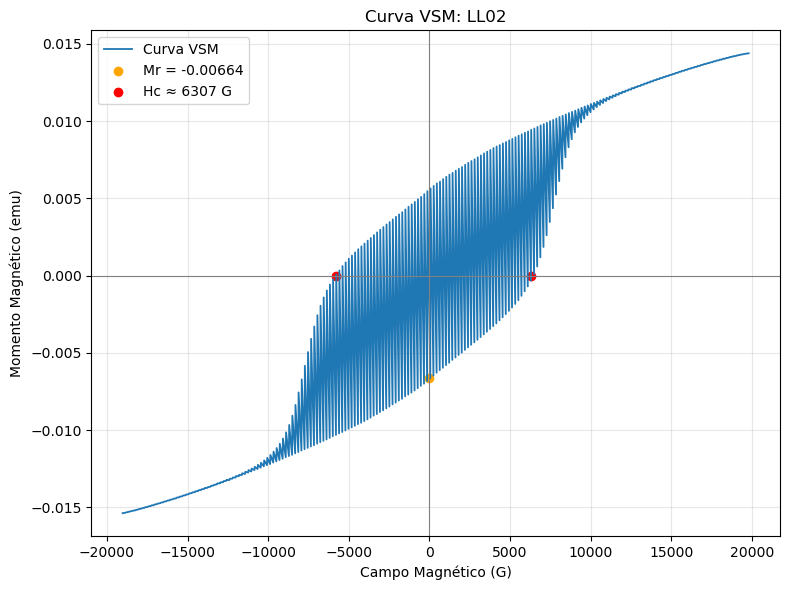

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
ruta = r"C:\Users\Usuario\Desktop\Uni\Labo II\VSM\LL02_20kG_MF_v2.txt"
nombre_muestra = "LL02"

# --- LECTURA AUTOMÁTICA DEL ARCHIVO ---
with open(ruta, "r", encoding="utf-8") as f:
    lineas = f.readlines()

# Encontrar dónde empieza la tabla de datos
inicio = None
for i, linea in enumerate(lineas):
    if "***DATA***" in linea:
        inicio = i + 1
        break

# Extraer solo las líneas numéricas después de ***DATA***
datos = []
for linea in lineas[inicio:]:
    partes = linea.strip().split()
    if len(partes) == 2:
        try:
            campo = float(partes[0])
            momento = float(partes[1])
            datos.append([campo, momento])
        except ValueError:
            pass

df = pd.DataFrame(datos, columns=["Campo_G", "Momento_emu"])
df = df.dropna().sort_values("Campo_G")

# --- CÁLCULO DE PARÁMETROS MAGNÉTICOS ---
campo = df["Campo_G"].values
momento = df["Momento_emu"].values

# Saturación: promedio de los extremos (±90% del campo máximo)
Ms_pos = np.mean(momento[campo > np.max(campo) * 0.9])
Ms_neg = np.mean(momento[campo < np.min(campo) * 0.9])
Ms = (abs(Ms_pos) + abs(Ms_neg)) / 2

# Remanencia: valor más cercano a H = 0
idx_cero = np.argmin(abs(campo))
Mr = momento[idx_cero]

# Campo coercitivo: donde M cruza 0
signos = np.sign(momento)
cambio = np.where(np.diff(signos))[0]
if len(cambio) >= 2:
    Hc_neg = np.mean([campo[cambio[0]], campo[cambio[0] + 1]])
    Hc_pos = np.mean([campo[cambio[-1]], campo[cambio[-1] + 1]])
else:
    Hc_pos = Hc_neg = np.nan

# --- MOSTRAR RESULTADOS ---
print(f"--- {nombre_muestra} ---")
print(f"Ms (magnetización de saturación): {Ms:.5f} emu")
print(f"Mr (remanencia): {Mr:.5f} emu")
print(f"Hc- (coercitivo negativo): {Hc_neg:.1f} G")
print(f"Hc+ (coercitivo positivo): {Hc_pos:.1f} G")

# --- GRAFICAR ---
plt.figure(figsize=(8,6))
plt.plot(campo, momento, '-', lw=1.3, label='Curva VSM')
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)
plt.scatter([0], [Mr], color='orange', label=f"Mr = {Mr:.3g}")
plt.scatter([Hc_pos, Hc_neg], [0, 0], color='red', label=f"Hc ≈ {abs(Hc_pos):.0f} G")
plt.title(f"Curva VSM: {nombre_muestra}")
plt.xlabel("Campo Magnético (G)")
plt.ylabel("Momento Magnético (emu)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
